# Cohort Analysis & Customer Segmentation with RFM
- 출처 : https://www.kaggle.com/code/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm
---
## ▶︎ Cohort Analysis (Retention over User & Product Lifetime)
- 코호트는 공통적인 특성을 공유하는 주체들의 그룹이다.
- 코호트의 행동을 시간에 따라 관찰하고 다른 코호트와 비교할 수 있다.
- 코호트는 의학, 심리학, 계량경제학, 생태학 및 기타 여러 분야에서 사용되어 시간을 통해 교차섹션(주체 간의 차이 비교)을 수행하는 데 사용된다.
![image](http://d35fo82fjcw0y8.cloudfront.net/2016/03/03210554/table1a2.png)

## ▶︎ Types of cohorts (코호트 종류)
- 시간 코호트(Time Cohorts): 특정 시간 프레임 내에 제품 또는 서비스에 가입한 고객들을 의미합니다. 이러한 코호트를 분석하면 고객들의 행동을 그들이 회사의 제품이나 서비스를 사용하기 시작한 시간에 따라 파악할 수 있습니다. 이 시간 간격은 월별, 분기별 또는 일일 수도 있습니다.

- 행동 코호트(Behavior Cohorts): 과거에 제품을 구매하거나 서비스에 가입한 고객들을 가리킵니다. 이러한 코호트는 가입한 제품 또는 서비스의 유형에 따라 고객들을 그룹화합니다. 기본 수준의 서비스에 가입한 고객들은 고급 서비스에 가입한 고객들과 다른 Bed could have different needs than those who signed up for advanced services. 고객군의 다양한 요구 사항을 이해하면 기업이 특정 세그먼트를 위한 맞춤형 서비스나 제품을 디자인하는 데 도움이 될 수 있습니다.

- 크기 코호트(Size Cohorts): 회사의 제품이나 서비스를 구매한 고객들의 다양한 크기를 나타냅니다. 이 분류는 획득 이후 일정 기간 동안 지출액에 기반하거나, 고객이 일정 기간 동안 주문 금액의 대부분을 지출한 제품 유형에 따라 이루어질 수 있습니다.

### Import Libraries and DataSet

In [1]:
# pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import os
df = pd.read_excel('Online Retail.xlsx')

# 소수점 자리수 설정
# pd.options.display.float_format = '{:.2f}'.format

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Explore + Clean the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> 👉 Description 과, CustomerID에 결측지 있음. 확인 필요!

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
df.isnull().sum().sum()

0

In [8]:
# 데이터프레임의 각 행에 대해 중복 여부를 검사 > true로 반환
df.duplicated().sum()

5225

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


> 👉 UnitPrice의 최솟값이 0인 점, Quantity의 최솟값이 음수인 점 확인

In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
df.shape

(392692, 8)

### ✨ Cohort Analysis
- 코호트 분석을 위해 생성해야할 레이블이 있다
    1. 송장 기간(Invoice period): 단일 거래/송장의 연도와 월을 문자열로 나타냄
    2. 코호트 그룹(Cohort group) : 고객의 첫 구매 연도와 월을 문자열로 나타냄(특정 고객의 모든 송장에서 공통적으로 사용)
    3. 코호트 기간 / 코호트 인덱스(Cohort period / Cohort Index) : 첫 구매 이후 지난 개월 수

In [14]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1) #해당 연, 월의 첫번째 날

In [16]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


#### ▶︎ 고객별 첫 구매 연/월을 도출
- 데이터프레임(df)에서 'CustomerID'를 기준으로 그룹화한 후, 
- 각 그룹에 대해 'InvoiceMonth' 열에서 최솟값을 찾아 'CohortMonth' 열에 할당

In [17]:
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


#### ▶︎ 고객별 첫 구매 날짜로부터 구매일까지 소요된 시간 계산

In [18]:
def get_month_int(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [19]:
invoice_year, invoice_month, _ = get_month_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth')

In [20]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [21]:
print(type(invoice_year))
print(type(year_diff))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [22]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
23346,538198,21733,RED HANGING HEART T-LIGHT HOLDER,2,2010-12-10 11:01:00,2.95,17827.0,United Kingdom,2010-12-01,2010-12-01,1
87857,543734,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,144,2011-02-11 12:22:00,0.55,17512.0,United Kingdom,2011-02-01,2011-02-01,1
420843,572911,21902,"KEY FOB , FRONT DOOR",10,2011-10-26 16:03:00,0.65,16345.0,United Kingdom,2011-10-01,2011-10-01,1
463688,576070,22835,HOT WATER BOTTLE I AM SO POORLY,2,2011-11-13 15:58:00,4.95,13451.0,United Kingdom,2011-11-01,2011-01-01,11
479047,577128,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,1,2011-11-17 19:48:00,2.95,14508.0,United Kingdom,2011-11-01,2011-09-01,3


#### ▶︎ 코호트 별로 월간 활성 유저(고객) 계산

In [23]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [24]:
cohort_data = cohort_data.reset_index()
cohort_data.head(3)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286


In [25]:
# 각 코호트에서 각 월별 활동한 고객 수
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ▶︎ Retention Rate Table : 고객 유지율(Retention Rate)

In [26]:
# 각 코호트의 초기 고객 수
cohort_size = cohort_counts.iloc[:, 0]
cohort_size

CohortMonth
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

In [27]:
# 각 월별 고객의 유지율
retention = cohort_counts.divide(cohort_size, axis=0) #axis 열방향
retention.round(3) * 100 #백분율로

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


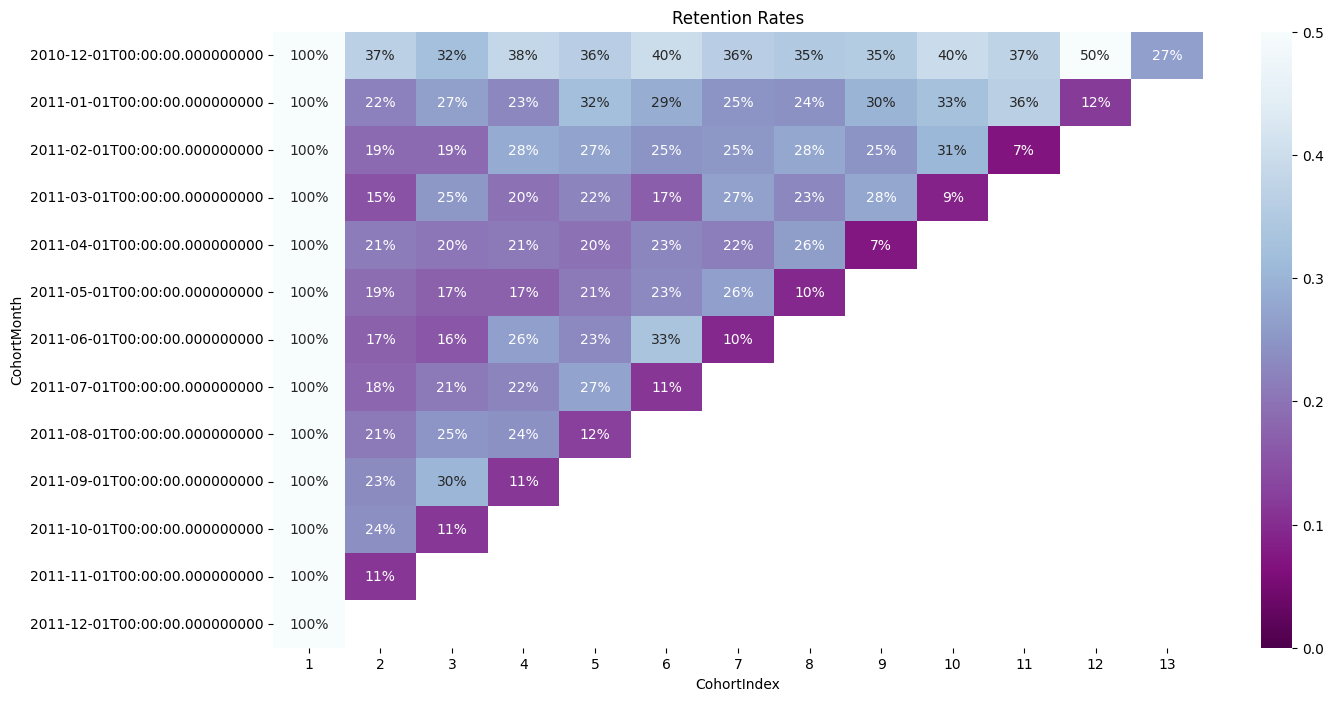

In [28]:
# 히트맵
plt.figure(figsize = (15, 8))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuPu_r')
plt.show()

> 👉 고객 유지율은 모든 고객 중에서 아직 활동 중인 고객이 얼마나 되는지를 이해하는 매우 유용한 지표이다.

#### ▶︎ Average quantity for each cohort

In [29]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean().reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,12.117180
1,2010-12-01,2,15.670062
2,2010-12-01,3,15.725860
3,2010-12-01,4,15.931121
4,2010-12-01,5,13.625364


In [30]:
avg_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
avg_quantity.round(1)
avg_quantity.index = avg_quantity.index.date #인덱스를 날짜로(시간 정보를 무시)

avg_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,12.117180,15.670062,15.725860,15.931121,13.625364,14.922736,16.113199,15.638083,18.207405,17.700028,19.047018,13.599991,15.383382
2011-01-01,17.471086,13.471931,12.707503,15.283843,12.845407,15.388923,14.974063,14.991561,11.628981,10.623621,9.597151,10.184408,NaN
2011-02-01,11.201903,13.740634,19.032478,12.045838,12.335834,12.330517,13.571174,13.401471,10.965646,12.416324,13.390244,NaN,NaN
2011-03-01,9.962552,11.741027,13.310624,10.120573,13.756057,13.014265,13.456492,13.851474,11.324869,9.700103,NaN,NaN,NaN
2011-04-01,10.043702,10.417740,9.772586,11.870370,11.962770,8.691579,10.001070,9.678404,7.567251,NaN,NaN,NaN,NaN
2011-05-01,11.457044,9.745116,14.224062,12.757906,11.217013,8.758695,10.764495,113.763089,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.664896,14.727072,10.869873,13.663137,10.690449,9.960707,9.506494,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.921021,13.750499,7.398021,8.178144,6.213636,7.164410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.083230,6.199246,5.440127,6.150660,7.056730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,12.138359,6.316353,8.090107,8.959397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


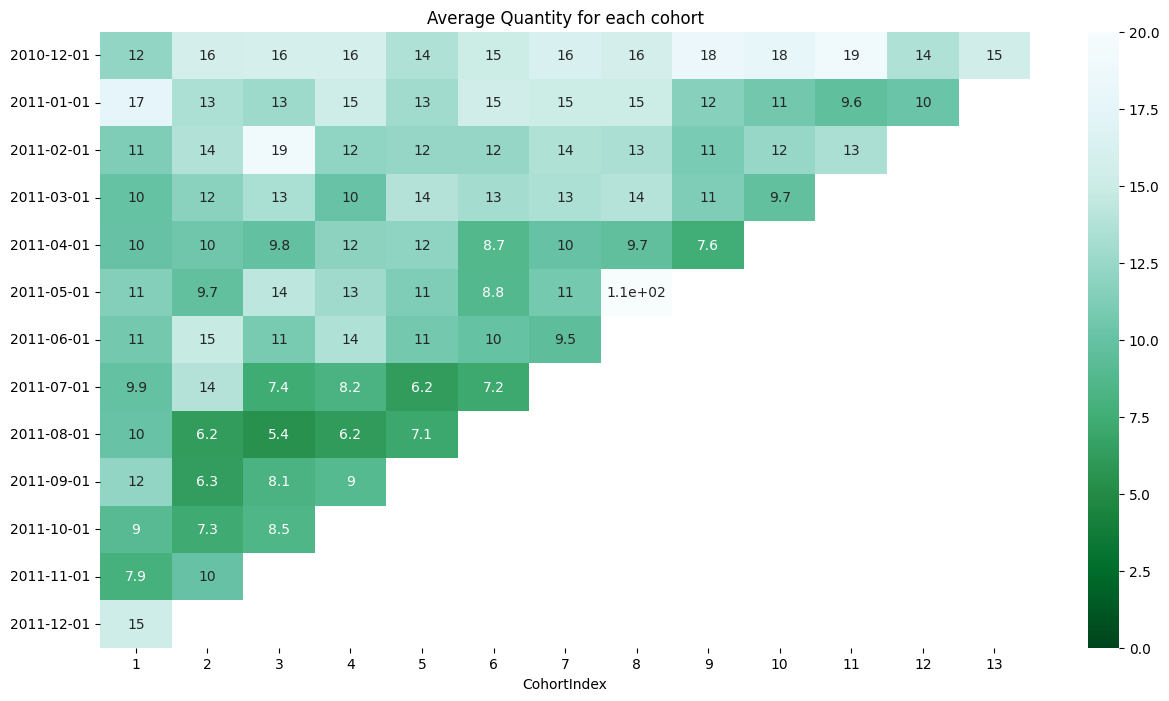

In [31]:
plt.figure(figsize = (15, 8))
plt.title('Average Quantity for each cohort')
sns.heatmap(data=avg_quantity, annot=True, vmin=0.0, vmax=20, cmap='BuGn_r')
plt.show()

### ✨ RFM
- Recency(최근성), Frequency(빈도), Monetary(금액)
- 최근성(Recency): 고객의 마지막 주문이 언제였는지에 관한 지표
    - 고객이 마지막 구매를 한 날로 해석하며
    - 웹사이트나 앱의 경우, 이것은 고객의 마지막 방문일 또는 마지막 로그인 시간으로 해석될 수 있습니다.

- 빈도(Frequency): 주어진 기간 내의 구매 횟수에 관한 지표
    - 이 기간은 3개월, 6개월 또는 1년 등으로 설정될 수 있다
    - 이 지표는 고객이 회사의 제품을 얼마나 자주 또는 많이 사용하는지를 이해하는 데 사용된다
    - 이 값이 클수록 고객들은 더 활발하게 제품을 이용하고 있다고 볼 수 있다 <br>
        그러나 이들을 반드시 VIP로 간주할 필요는 없다. ->> 실제로 각 구매마다 얼마나 지불했는지도 고려해야 하기 때문

- 금액(Monetary): 주어진 기간 내에서 고객이 지불한 총 금액에 관한 지표
    - 따라서 큰 금액을 지불한 고객들은 MVP 또는 VIP와 같이 다른 고객과 구분될 수 있다
---
#### ▶︎ Recency, Frequency and Monetary Value calculation

- 백분위수(예: 분위수) 기반 그룹화
- 파레토 80/20 기준
- 사용자 정의 그룹화 : 비즈니스 지식을 기반으로

In [32]:
# 총 구매금액 컬럼 생성
df['TotalSum'] = df['UnitPrice'] * df['Quantity']

In [33]:
print('Min Invoice Date: ', df.InvoiceDate.dt.date.min(), 'max Invoice Date: ', df.InvoiceDate.dt.date.max(), '\n')
df.head(3)

Min Invoice Date:  2010-12-01 max Invoice Date:  2011-12-09 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00


In [34]:
# 현실적으로 오늘 또는 어제의 가장 최근 데이터를 기준으로 함
# InvoiceDate' 열에서 가장 최대 날짜를 찾은 다음, 그 날짜에 하루를 더하는 연산을 수행
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [35]:
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                               'InvoiceNo':'count',
                               'TotalSum':'sum'})

rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalSum':'MonetaryValue'}, inplace=True)

In [36]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [37]:
# RFM Segment 
r_label = range(4, 0, -1) #작을수록 중요고객
f_label = range(1, 5) #클수록 중요고객
m_label = range(1, 5) #클수록 중요고객

r_quantiles = pd.qcut(rfm['Recency'], q=4, labels = r_label)
f_quantiles = pd.qcut(rfm['Frequency'], q=4, labels = f_label)
m_quantiles = pd.qcut(rfm['MonetaryValue'], q=4, labels = m_label)

In [38]:
type(r_quantiles)

pandas.core.series.Series

In [39]:
rfm = rfm.assign(R = r_quantiles, F = f_quantiles, M = m_quantiles)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [40]:
# RFM Score
def add_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [41]:
rfm['RFM_Segment'] = rfm.apply(add_rfm, axis=1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


#### ▶︎ Analyzing RFM Segments
- 비즈니스 액션 적용이나 타게팅 전에, 각 segment 사이즈를 확인하는 것이 좋다

In [42]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending = False)[:5]

RFM_Segment
4.04.04.0    450
1.01.01.0    381
3.04.04.0    217
1.02.02.0    206
2.01.01.0    179
dtype: int64

In [43]:
# segment 필터링
rfm[rfm['RFM_Segment']=='1.01.01.0'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12353.0,204,4,89.00,1,1,1,1.01.01.0,3
12361.0,287,10,189.90,1,1,1,1.01.01.0,3
12401.0,303,5,84.30,1,1,1,1.01.01.0,3
12402.0,323,11,225.60,1,1,1,1.01.01.0,3
12441.0,367,11,173.55,1,1,1,1.01.01.0,3


In [44]:
# RFM Score 별로 요약통계
rfm.groupby(['RFM_Score']).agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           260.7       8.2         157.4   381
4           177.2      13.6         240.0   388
5           152.9      21.2         366.6   518
6            95.9      27.9         820.8   457
7            79.6      38.0         758.1   463
8            64.1      56.0         987.3   454
9            45.9      78.7        1795.1   414
10           32.4     110.5        2056.4   426
11           21.3     186.9        4062.0   387
12            7.2     367.8        9285.9   450

In [45]:
# Use RFM score to group customers into Gold, Silver and Bronze segments

def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) & (df['RFM_Score'] <= 9):
        return 'Silver'
    else:
        return 'Bronze'


In [46]:
rfm['General_Segment'] = rfm.apply(segments, axis=1)

In [47]:
rfm.groupby(['General_Segment']).agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            192.2      15.1         266.5  1287
Gold               20.1     225.6        5246.8  1263
Silver             72.0      49.4        1072.4  1788

### ✨ Data Pre-Processing for Kmeans Clustering

- K-평균 군집화 모델을 구현하기 전에 다음과 같은 중요한 가정을 확인해야함
    - 변수의 대칭적 분포(왜도가 없음) : 데이터가 한쪽으로 치우치지 않는 것이 중요 > 왜도(Skewness)가 낮을수록 이 가정이 충족됨
    - 변수들은 같은 평균값을 가짐: 각 변수의 평균값이 서로 다르지 않고 유사한 값을 가져야 함 > 군집화 알고리즘이 각 변수의 중요성을 동등하게 고려할 수 있음
    - 변수들은 같은 분산을 가짐: 변수들의 분산이 서로 비슷해야 함 > 분산이 크게 다른 경우, 군집화 알고리즘이 분산이 큰 변수에 민감하게 반응할 수 있음
    
- 이러한 가정들은 K-평균 군집화 모델의 성능과 정확도에 영향을 미치므로 데이터 전처리 및 가공 단계에서 이러한 가정을 고려하여 데이터를 준비하는 것이 중요하다!

In [48]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
rfm_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


> 👉 평균과 분산이 다르므로, 스케일러 사용해야함

In [49]:
import warnings
warnings.filterwarnings('ignore')

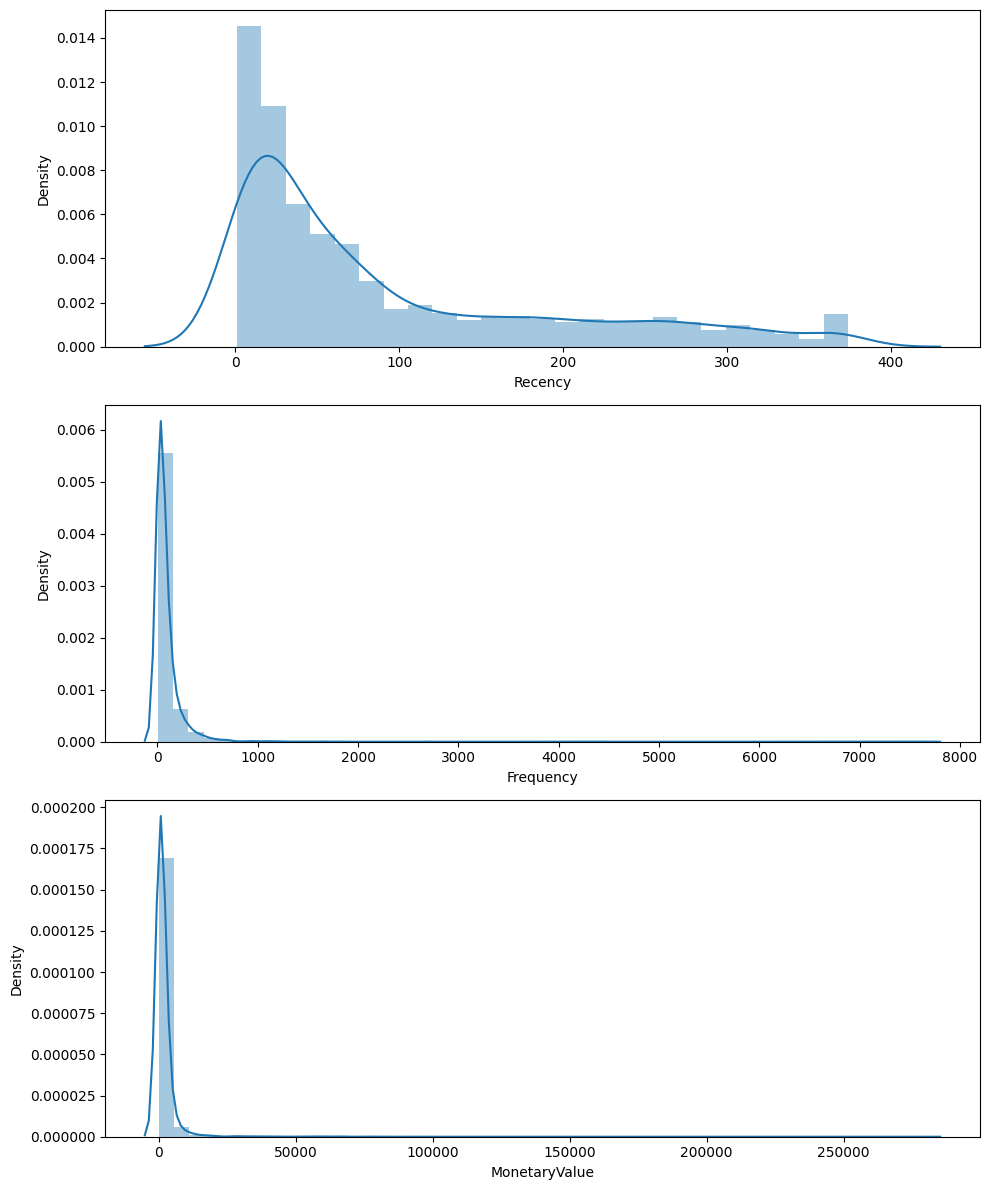

In [50]:
f, ax = plt.subplots(figsize = (10, 12))
plt.subplot(3, 1, 1);sns.distplot(rfm.Recency, label = 'Recency')

plt.subplot(3, 1, 2);sns.distplot(rfm.Frequency, label = 'Frequency')

plt.subplot(3, 1, 3);sns.distplot(rfm.MonetaryValue, label = 'MonetaryValue')

# plt.style.use('fivehirtyeight')
plt.tight_layout()
plt.show()

- 문제: 변수의 비대칭 분포 (데이터가 치우침)
- 해결책: 로그 변환 (양수 값만)을 통해 비대칭 조정

**[단계]**
1. 데이터 비대칭 조정 - 로그 변환
2. 평균값을 동일하게 표준화
3. 표준 편차를 동일하게 스케일링
4. 클러스터링에 사용할 별도의 배열로 저장

In [51]:
# 로그 변환으로 왜도 낮추기
rfm_log = rfm[['Recency','Frequency','MonetaryValue']].apply(np.log, axis=1).round(3)

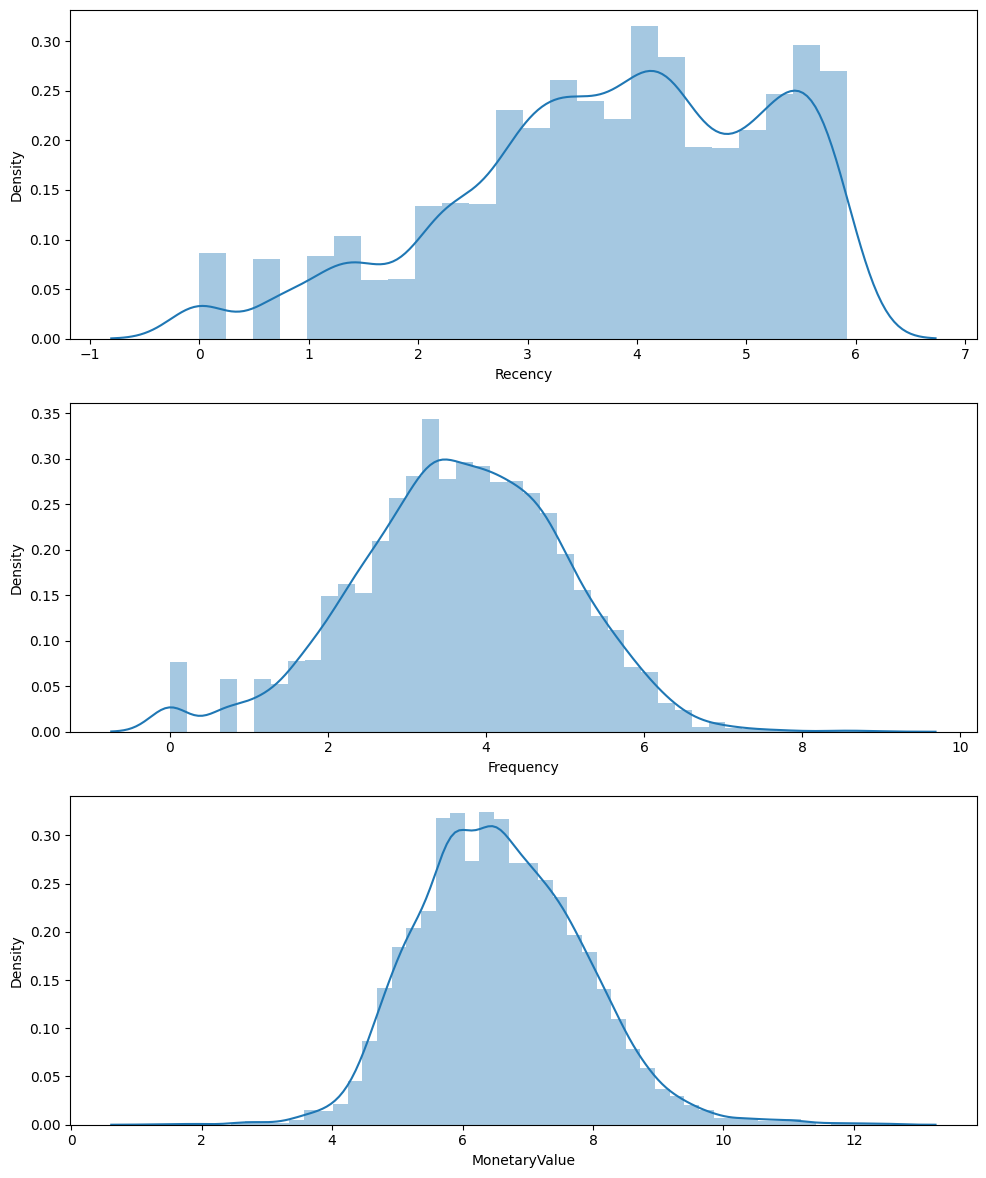

In [52]:
# 로그변환된 RFM값 분포 확인
f, ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1);sns.distplot(rfm_log.Recency, label='Recency')
plt.subplot(3, 1, 2);sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3);sns.distplot(rfm_log.MonetaryValue, label = 'MonetaryValue')

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

### ✨ Implementation of K-Means Clustering

1. 데이터 전처리
2. 군집의 개수 선택
3. 전처리된 데이터에서 k-평균 군집화 실행
4. 각 군집의 평균 RFM 값 분석




#### 1. 데이터 전처리(Data Pre-Processing)

In [53]:
# #Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)

#### 2. 군집 개수 선택(Choosing a Number of Clusters)
- 군집 선택 방법
    1. 시각적 방법 : 엘보우 기준
    2. 수학적 방법 : 실루엣 계수
    3. 실험과 해석
---
- 엘보우 기준 방법
    1. 군집 개수를 군집 내 제곱 오차의 합 (SSE)에 대해 그림 ->> SSE는 각 데이터 포인트에서 해당 군집 중심까지의 제곱 거리의 합
    2. 그래프에서 "엘보"를 식별
    3. 엘보는 "최적" 군집 개수를 나타내는 지점

In [62]:
from sklearn.cluster import KMeans

# ks = range(1, 8)
# inertias =[]

# for k in ks:
#     # 군집 생성
#     kc = KMeans(n_clusters = k, random_state=11)
#     kc.fit(rfm_normalized)
#     inertias.append(kc.inertia_)

In [ ]:
"""
f, ax = plt.subplots(figsize = (15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()
"""

> k(군집 수)는 3으로 설정

In [ ]:
# 군집화 실행
from sklearn.cluster import KMeans
kc = KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalized)

# 원래 데이터프레임에 군집 라벨 만들기
cluster_labels = kc.labels_
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

# 군집별 RFM 평균과 크기 계산
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']}).round(0)

### Snake plots to understand and compare segments

Market research technique to compare different segments
Visual representation of each segment's attributes
Need to first normalize data (center & scale)
Plot each cluster's average normalized values of each attribute

In [56]:
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm_rfm.index, columns = rfm_rfm.columns)

In [58]:
rfm_normalized['K_Cluster'] = kc.labels_

NameError: name 'kc' is not defined

In [55]:
rfm_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05
